## SPARK FOUNDATION -DATA SCIENCE AND BUSINESS ANAYST

# TASK-03 EDA-Retail

#### AUTHOR-HIMANI CHHOKAR

Perform 'Exploratory Data Analysis' on the provided dataset "SampleSuperStore". 
Suppose,you are the buisness owner of retail firm and want to see how your company is performing.
You are interested to find out the weak areas where you can work to make profit.
What all buisness problems you can derive by looking into the data?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from plotnine.data import economics
#from plotnine import ggplot, aes, geom_line
from plotnine import *


## preprocessing and Basic data cleaning

In [3]:
dataset=pd.read_csv('SampleSuperstore.csv')
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
dataset.isnull().any().sum()

0

In [5]:
dataset.duplicated().sum()

17

In [6]:
dataset.shape

(9994, 13)

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
dataset.shape

(9977, 13)

In [9]:
dataset.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
dataset.drop(['Country'],axis=1,inplace=True)

In [11]:
dataset

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
dataset['Segment'] = l.fit_transform(dataset['Segment'])
dataset['City'] = l.fit_transform(dataset['City'])
dataset['State'] = l.fit_transform(dataset['State'])
dataset['Region'] = l.fit_transform(dataset['Region'])
dataset['Category'] = l.fit_transform(dataset['Category'])
dataset['Sub-Category'] = l.fit_transform(dataset['Sub-Category'])
dataset['Ship Mode'] = l.fit_transform(dataset['Ship Mode'])


In [13]:
dataset

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,194,15,42420,2,0,4,261.9600,2,0.00,41.9136
1,2,0,194,15,42420,2,0,5,731.9400,3,0.00,219.5820
2,2,1,266,3,90036,3,1,10,14.6200,2,0.00,6.8714
3,3,0,153,8,33311,2,0,16,957.5775,5,0.45,-383.0310
4,3,0,153,8,33311,2,1,14,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2,0,295,8,33180,2,0,9,25.2480,3,0.20,4.1028
9990,3,0,104,3,92627,3,0,9,91.9600,2,0.00,15.6332
9991,3,0,104,3,92627,3,2,13,258.5760,2,0.20,19.3932
9992,3,0,104,3,92627,3,1,12,29.6000,4,0.00,13.3200


In [14]:
#correlation of the dataset
dataset.corr()


,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,1.000000,-0.004652,-0.004018,0.011774,-0.004298,-0.024384,-0.003825,-0.003466,-0.001764,0.022629,-0.000046,-0.006568
Segment,-0.004652,1.000000,0.005416,-0.002976,-0.010739,-0.005621,0.010548,0.011221,0.010936,0.008183,-0.017006,0.013419
City,-0.004018,0.005416,1.000000,0.009587,0.092789,0.281052,0.013530,-0.006802,0.005939,-0.000878,-0.151003,0.024287
State,0.011774,-0.002976,0.009587,1.000000,-0.285965,-0.445149,0.006595,-0.002682,0.004131,-0.000480,0.162957,-0.025304
Postal Code,-0.004298,-0.010739,0.092789,-0.285965,1.000000,0.474290,-0.002262,-0.004442,-0.023476,0.013110,0.059225,-0.029892
Region,-0.024384,-0.005621,0.281052,-0.445149,0.474290,1.000000,-0.005277,0.008522,0.004508,0.013606,-0.211995,0.022295
Category,-0.003825,0.010548,0.013530,0.006595,-0.002262,-0.005277,1.000000,-0.075875,0.040116,-0.003839,-0.063086,0.091507
Sub-Category,-0.003466,0.011221,-0.006802,-0.002682,-0.004442,0.008522,-0.075875,1.000000,0.060171,-0.017052,-0.153026,-0.029472
Sales,-0.001764,0.010936,0.005939,0.004131,-0.023476,0.004508,0.040116,0.060171,1.000000,0.200722,-0.028311,0.479067
Quantity,0.022629,0.008183,-0.000878,-0.000480,0.013110,0.013606,-0.003839,-0.017052,0.200722,1.000000,0.008678,0.066211


In [15]:
#find the covariance of the dataset
dataset.cov()


,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
Ship Mode,1.212575,-0.003906,-0.615633,0.200964,-1.517197e+02,-0.031200,-0.002653,-0.019287,-1.211367,0.055484,-0.000011,-1.695688
Segment,-0.003906,0.581456,0.574663,-0.035178,-2.625300e+02,-0.004980,0.005066,0.043233,5.201160,0.013894,-0.002677,2.399034
City,-0.615633,0.574663,19361.613455,20.677981,4.139113e+05,45.441470,1.185814,-4.782730,515.423422,-0.271934,-4.337926,792.335119
State,0.200964,-0.035178,20.677981,240.273967,-1.421038e+05,-8.017780,0.064387,-0.210069,39.938651,-0.016579,0.521497,-91.960899
Postal Code,-151.719734,-262.529986,413911.323679,-142103.849174,1.027732e+09,17667.660492,-45.681207,-719.549513,-469412.768497,935.818272,391.989291,-224679.858643
Region,-0.031200,-0.004980,45.441470,-8.017780,1.766766e+04,1.350175,-0.003862,0.050036,3.267193,0.035203,-0.050857,6.073818
Category,-0.002653,0.005066,1.185814,0.064387,-4.568121e+01,-0.003862,0.396716,-0.241479,15.759630,-0.005384,-0.008204,13.513248
Sub-Category,-0.019287,0.043233,-4.782730,-0.210069,-7.195495e+02,0.050036,-0.241479,25.531593,189.633494,-0.191847,-0.159636,-34.914554
Sales,-1.211367,5.201160,515.423422,39.938651,-4.694128e+05,3.267193,15.759630,189.633494,389028.396022,278.765576,-3.645637,70057.067126
Quantity,0.055484,0.013894,-0.271934,-0.016579,9.358183e+02,0.035203,-0.005384,-0.191847,278.765576,4.958001,0.003990,34.565743


In [16]:
dataset.value_counts()

Ship Mode  Segment  City  State  Postal Code  Region  Category  Sub-Category  Sales     Quantity  Discount  Profit   
3          2        530   1      85364        3       2         11            599.985   5         0.7       -479.9880    1
2          1        243   41     78041        0       1         3             2.286     3         0.8       -3.6576      1
                    258   2      72209        2       1         7             182.940   3         0.0        85.9818     1
                    245   26     89115        3       1         12            97.880    2         0.0        48.9400     1
                                                                              32.400    5         0.0        15.8760     1
                                                                                                                        ..
3          0        438   3      94110        3       1         3             2022.272  8         0.2        682.5168    1
                     

In [17]:
dataset.drop(['Postal Code'],axis=1,inplace=True)


In [18]:
dataset.describe()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000,9977.000000,9977.000000,9977.00000
mean,2.234439,0.658815,279.865992,22.336975,1.570011,0.972838,7.58675,230.148902,3.790719,0.156278,28.69013
std,1.101170,0.762533,139.146015,15.500773,1.161970,0.629854,5.05288,623.721409,2.226657,0.206455,234.45784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.444000,1.000000,0.000000,-6599.97800
25%,2.000000,0.000000,164.000000,4.000000,1.000000,1.000000,3.00000,17.300000,2.000000,0.000000,1.72620
50%,3.000000,0.000000,294.000000,27.000000,1.000000,1.000000,9.00000,54.816000,3.000000,0.200000,8.67100
75%,3.000000,1.000000,394.000000,36.000000,3.000000,1.000000,12.00000,209.970000,5.000000,0.200000,29.37200
max,3.000000,2.000000,530.000000,48.000000,3.000000,2.000000,16.00000,22638.480000,14.000000,0.800000,8399.97600


In [19]:
#removing the outlier in the dataset
def Outlier1(data):
    threshold=3
    for i in range(len(data.columns)):
        X=data.iloc[:,i]
        outlier=[]
        
        mean_data=np.mean(X)
        print(mean_data)
        std_data=np.std(X)
        print(std_data)
        for j in X:
            z_score=(j-mean_data)/std_data
            if np.abs(z_score)>threshold:
                outlier.append(j)
        for j in outlier:
            data=data[data[data.columns[i]]!=j]
    return data

In [20]:
dataset=Outlier1(dataset)

2.234439210183422
1.1011145768512425
0.6588152751328055
0.762494547459485
279.8659917810965
139.13904136011598
22.336975042597974
15.499996249136363
1.5700110253583242
1.1619121401673893
0.9728375263105142
0.629822397460851
7.586749523904982
5.052626406731442
230.14890150345346
623.6901502349401
3.759187817258883
2.205410824270854
0.15693452380953335
0.20720680668717867
22.10618028154108
97.56033556076704


In [21]:
dataset.shape

(9235, 11)

modeling of the data and finding the accuracy of the dataset

In [23]:
x=dataset.drop(['Profit'],axis=1)
y=dataset['Profit']


In [24]:
#to minimize the range of the attributes of the dataset since 
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler(feature_range=(0,1))
x = s.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [27]:
regression_model.score(x_train, y_train)

0.3546647235218757

In [28]:
regression_model.score(x_test, y_test)

0.4001648945960007

### data visualization

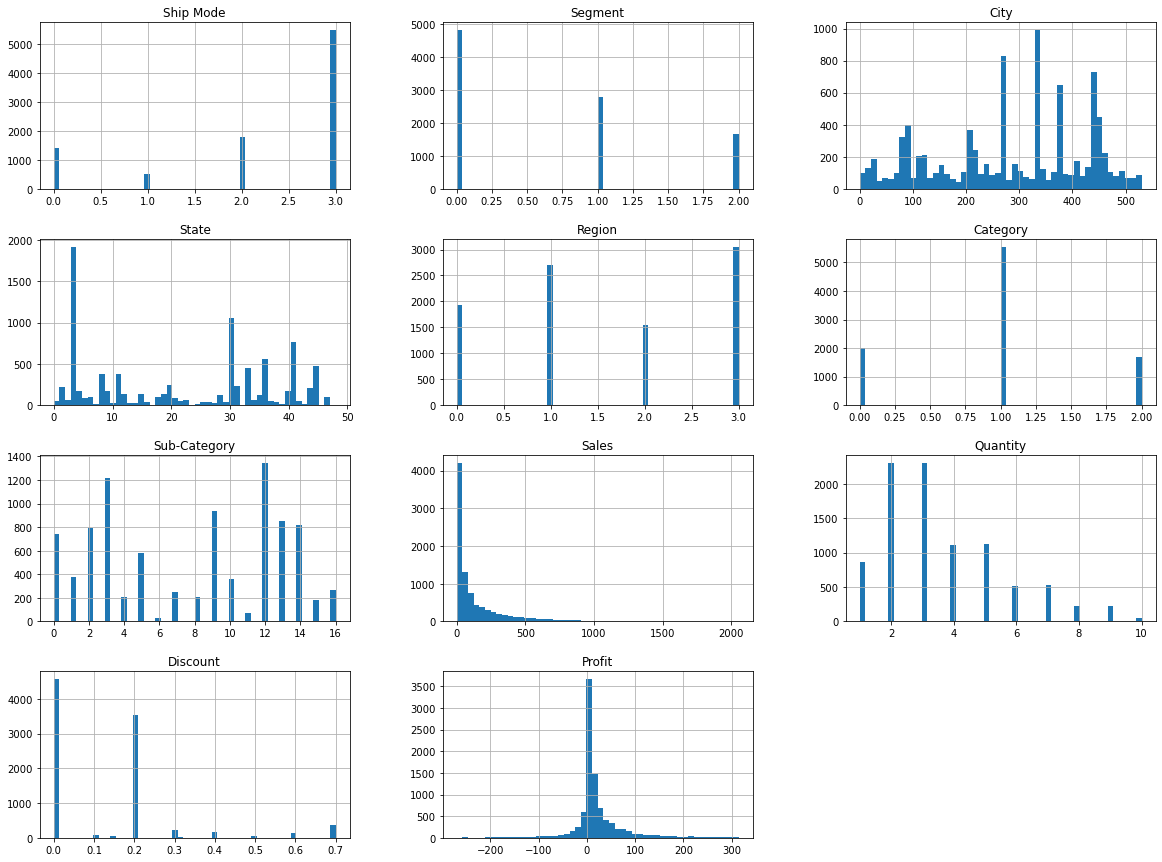

In [30]:
#histogram plot
dataset.hist(bins=50 ,figsize=(20,15))
plt.show()

#from the above graph we can say  that our data is not normal

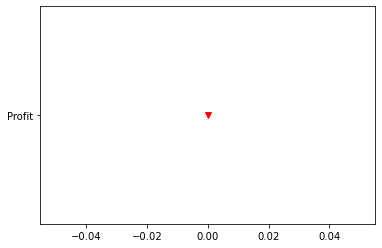

In [32]:
#Marker plot to check the profit graph
x=np.linspace(0,2,20)
plt.plot('Profit',marker="v",color="r")

In [33]:
df=pd.read_csv('SampleSuperstore.csv')
df.drop(['Country','Postal Code'],axis=1,inplace=True)


Text(0.5, 0.98, 'Pie Consumption Patterns in the United States')

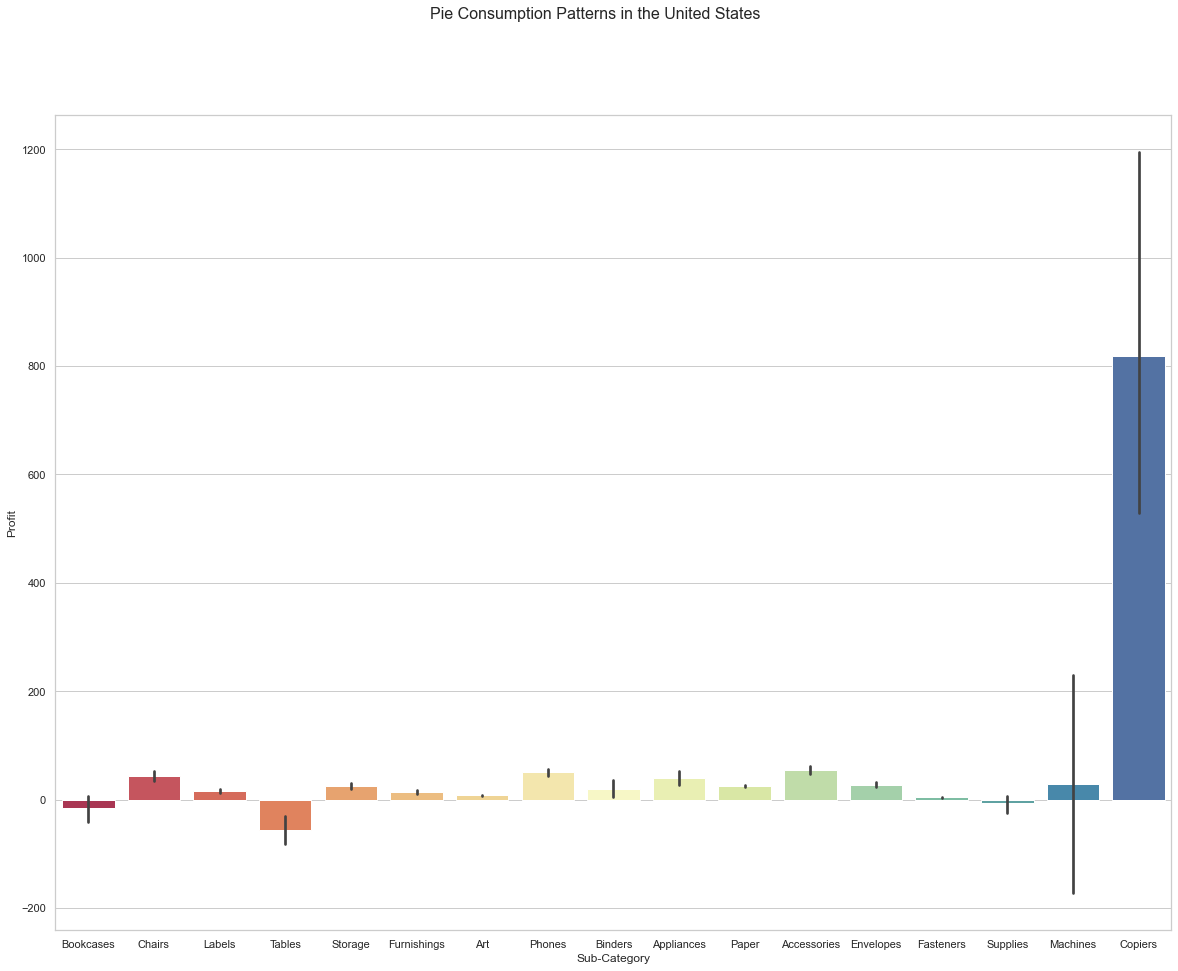

In [34]:
sn.set(style="whitegrid")
plt.figure(2, figsize=(20,15))

sn.barplot(x='Sub-Category',y='Profit', data=df, palette='Spectral')

plt.suptitle('Pie Consumption Patterns in the United States', fontsize=16)


#from the above graph we can say that"Copiers" Sub-category has gain highest amount of profit with no loss.
#There are other sub-categories too who are not faced any kind of losses but their profit margins are also low.

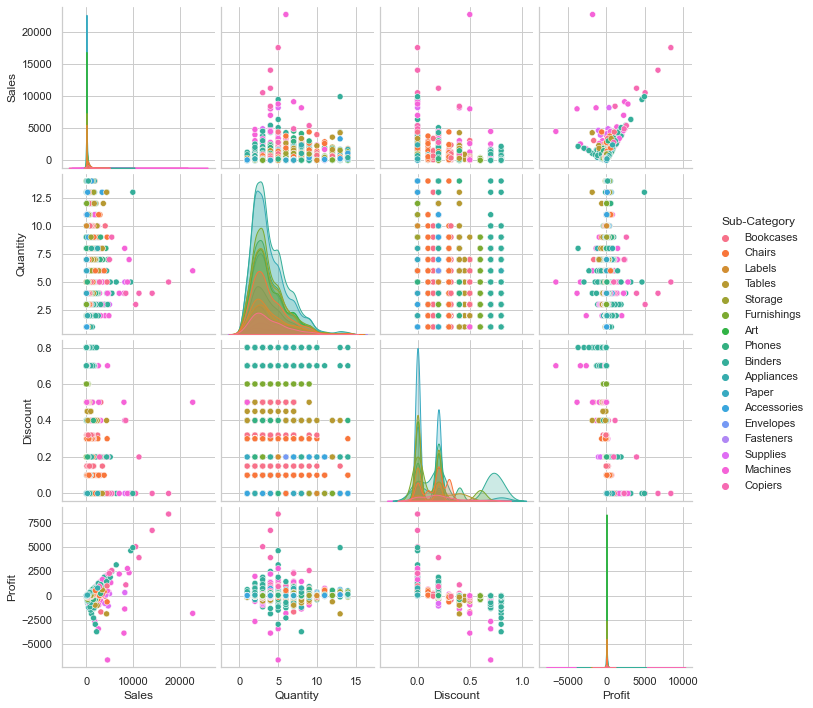

In [36]:
# pair plot allows us to see both distribution of single variables and relationships between two variables. 
sn.pairplot(df, hue="Sub-Category")


 from the above graph we observe that there many outlier in dataset and Tables","Supplies","Machines","Copiers","Bookcases"
has the lowest Sales.

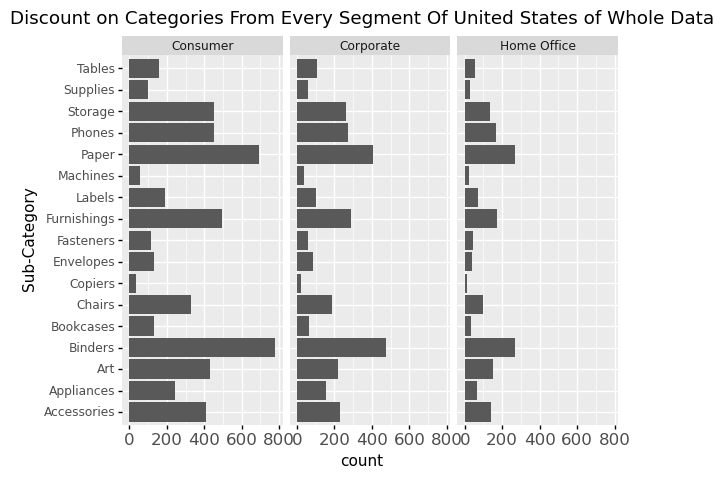

<ggplot: (13458107)>

In [38]:
(ggplot(df, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) +coord_flip()
+theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))


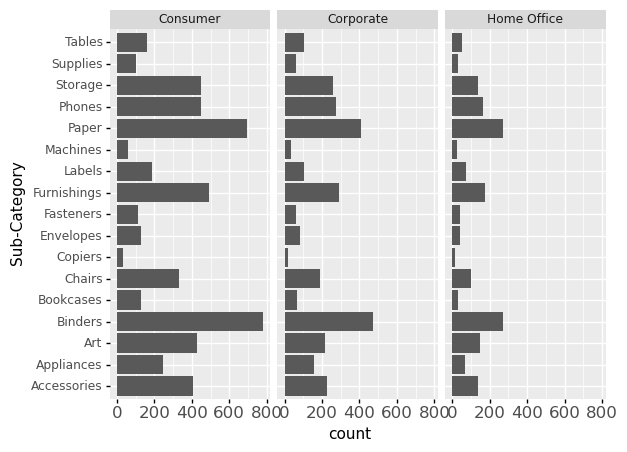

<ggplot: (-2134132445)>

In [39]:
(ggplot(df, aes(x='Sub-Category', fill='Profit')) + geom_bar() + facet_wrap(['Segment']) +coord_flip()
+theme(axis_text_x = element_text(size=12)))


from the above two graph we can say that the segment HOme office has purchased very less sub category and profit from office
segment is also low

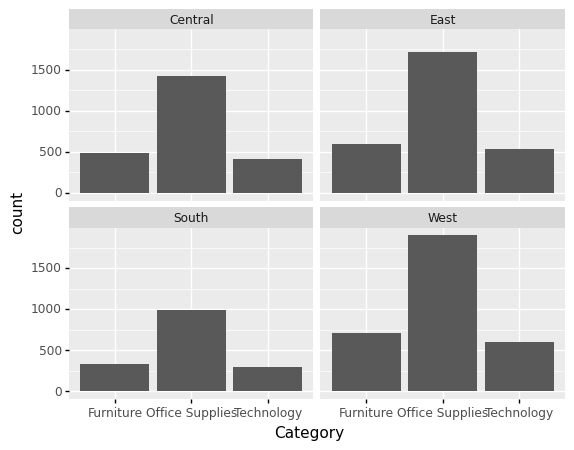

<ggplot: (13546990)>

In [41]:
#ggplot barplot to identify which region has the highest count of categoryi.e in every region office supplies has the highest
#count
ggplot(df) + aes(x="Category") + geom_bar() + facet_wrap(['Region'])


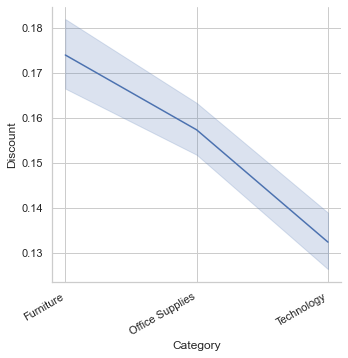

In [42]:
g = sn.relplot(x='Category', y="Discount",kind="line", data=df)
g.fig.autofmt_xdate()


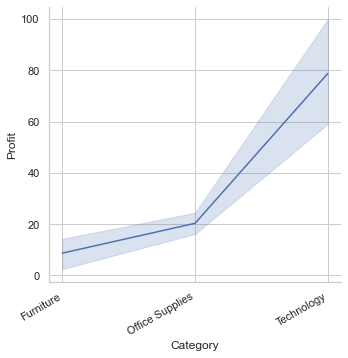

In [43]:
g = sn.relplot(x='Category', y="Profit",kind="line", data=df)
g.fig.autofmt_xdate()


 from the above graph three graph we can say that demand in office supplies sale is high but its still not making any kind of profit 
even though the is discount is high . so if decrease the discount is doesnt affect the profit.


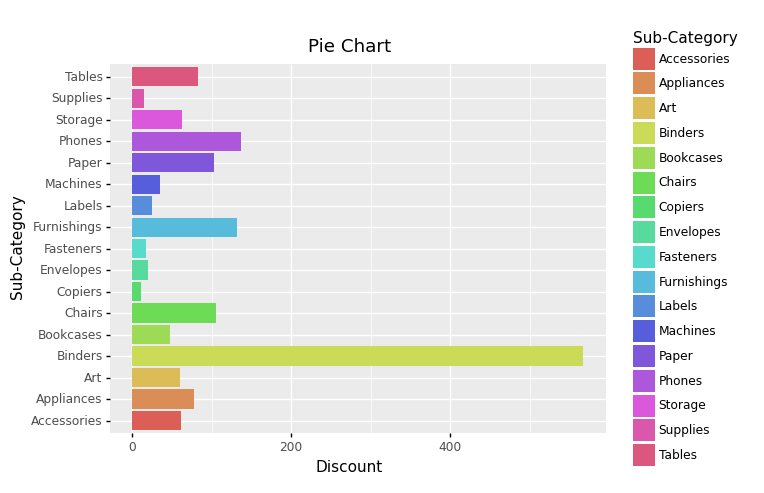

<ggplot: (-2134061058)>

In [45]:
from plotnine import ggplot, aes, geom_bar, coord_flip
(ggplot(df, aes(x='Sub-Category', y='Discount',fill='Sub-Category'))+ geom_col() +coord_flip() + ggtitle('Pie Chart'))


C:\Users\HIMANSHUL\.config\python juypter\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors
C:\Users\HIMANSHUL\.config\python juypter\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors


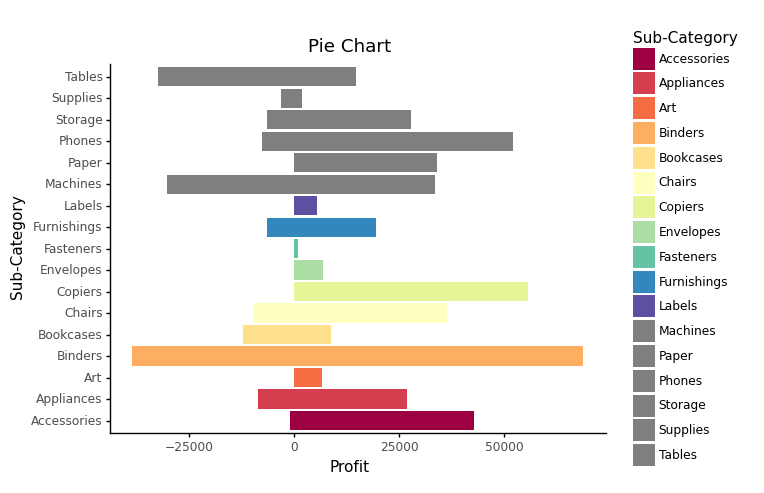

<ggplot: (16379411)>

In [46]:
Profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_plot)


from the above two graph we can say that the product which has a very high discount and still not making a profit and there are
roducts which has less discount but making high profit

In [ ]:
(ggplot(df, aes(x='Sub-category', y='Sales',fill='Profit'))+ geom_col() +coord_flip() + 
facet_wrap(['Region']))


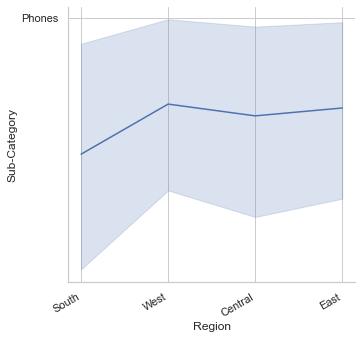

In [49]:
g = sn.relplot(x="Region", y="Sub-Category",kind="line", data=df)
g.fig.autofmt_xdate()


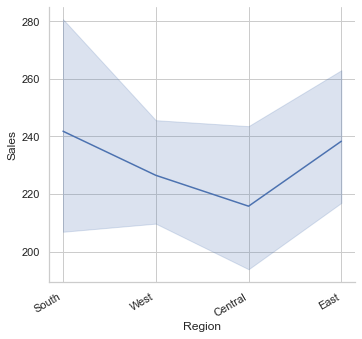

In [50]:
g = sn.relplot(x="Region", y="Sales",kind="line", data=df)
g.fig.autofmt_xdate()
    

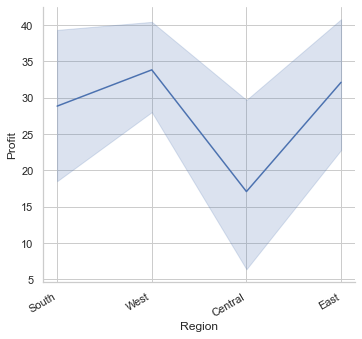

In [51]:
g = sn.relplot(x="Region", y="Profit",kind="line", data=df)
g.fig.autofmt_xdate()


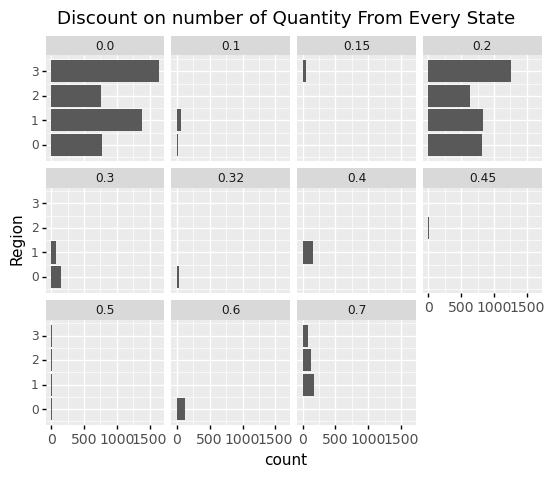

<ggplot: (13445867)>

In [52]:
(ggplot(dataset, aes(x='Region', fill='Quantity')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Discount'])+coord_flip()+ggtitle("Discount on number of Quantity From Every State"))


## clustering 
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters. The goal of the k-means algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.


K-Means Clustering algorithm used for unsupervised learning for clustering problem. K- variable value easily decide based 
on the number of clusters business is looking for.Popular Distance measures to use: Euclidean distance.Specify number 
of clusters K.Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the
centroids without replacement.Keep iterating until there is no change to the centroids. i.e assignment of data points
to clusters isn’t changing.


In [55]:
from sklearn.cluster import KMeans

ssw=[]
cluster_range=range(1,10)
for i in cluster_range:
    model=KMeans(n_clusters=i,init="k-means++",n_init=10, max_iter=300, random_state=0)
    model.fit(dataset)
    ssw.append(model.inertia_)


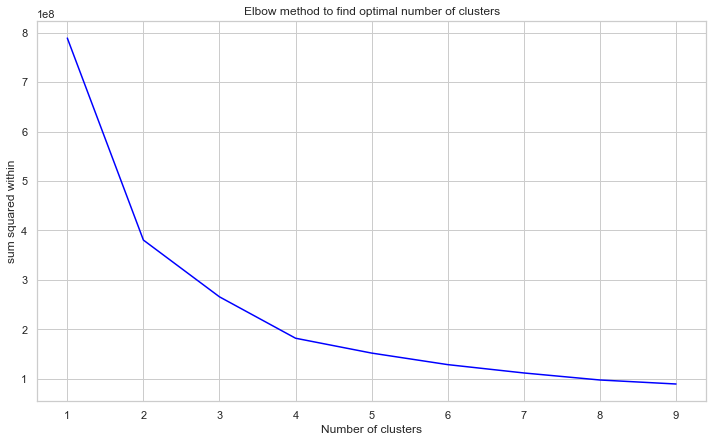

In [56]:
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw,color="blue")
plt.xlabel("Number of clusters")
plt.ylabel("sum squared within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()


In [57]:
# We'll continue our analysis with n_clusters=4
kmeans=KMeans(n_clusters=4, init="k-means++", n_init=10, random_state = 42)
# Fit the model
k_model=kmeans.fit(dataset)
## It returns the cluster vectors i.e. showing observations belonging which clusters 
clusters=k_model.labels_
clusters


array([0, 1, 2, ..., 0, 0, 2])

In [58]:
dataset['clusters'] = clusters


In [60]:
dataset['clusters'].value_counts()


2    4722
0    2848
1    1294
3     371
Name: clusters, dtype: int64

In [63]:
dataset.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,clusters
0,2,0,194,15,2,0,4,261.960,2,0.0,41.9136,0
1,2,0,194,15,2,0,5,731.940,3,0.0,219.5820,1
2,2,1,266,3,3,1,10,14.620,2,0.0,6.8714,2
4,3,0,153,8,2,1,14,22.368,2,0.2,2.5164,0
5,3,0,266,3,3,0,9,48.860,7,0.0,14.1694,2


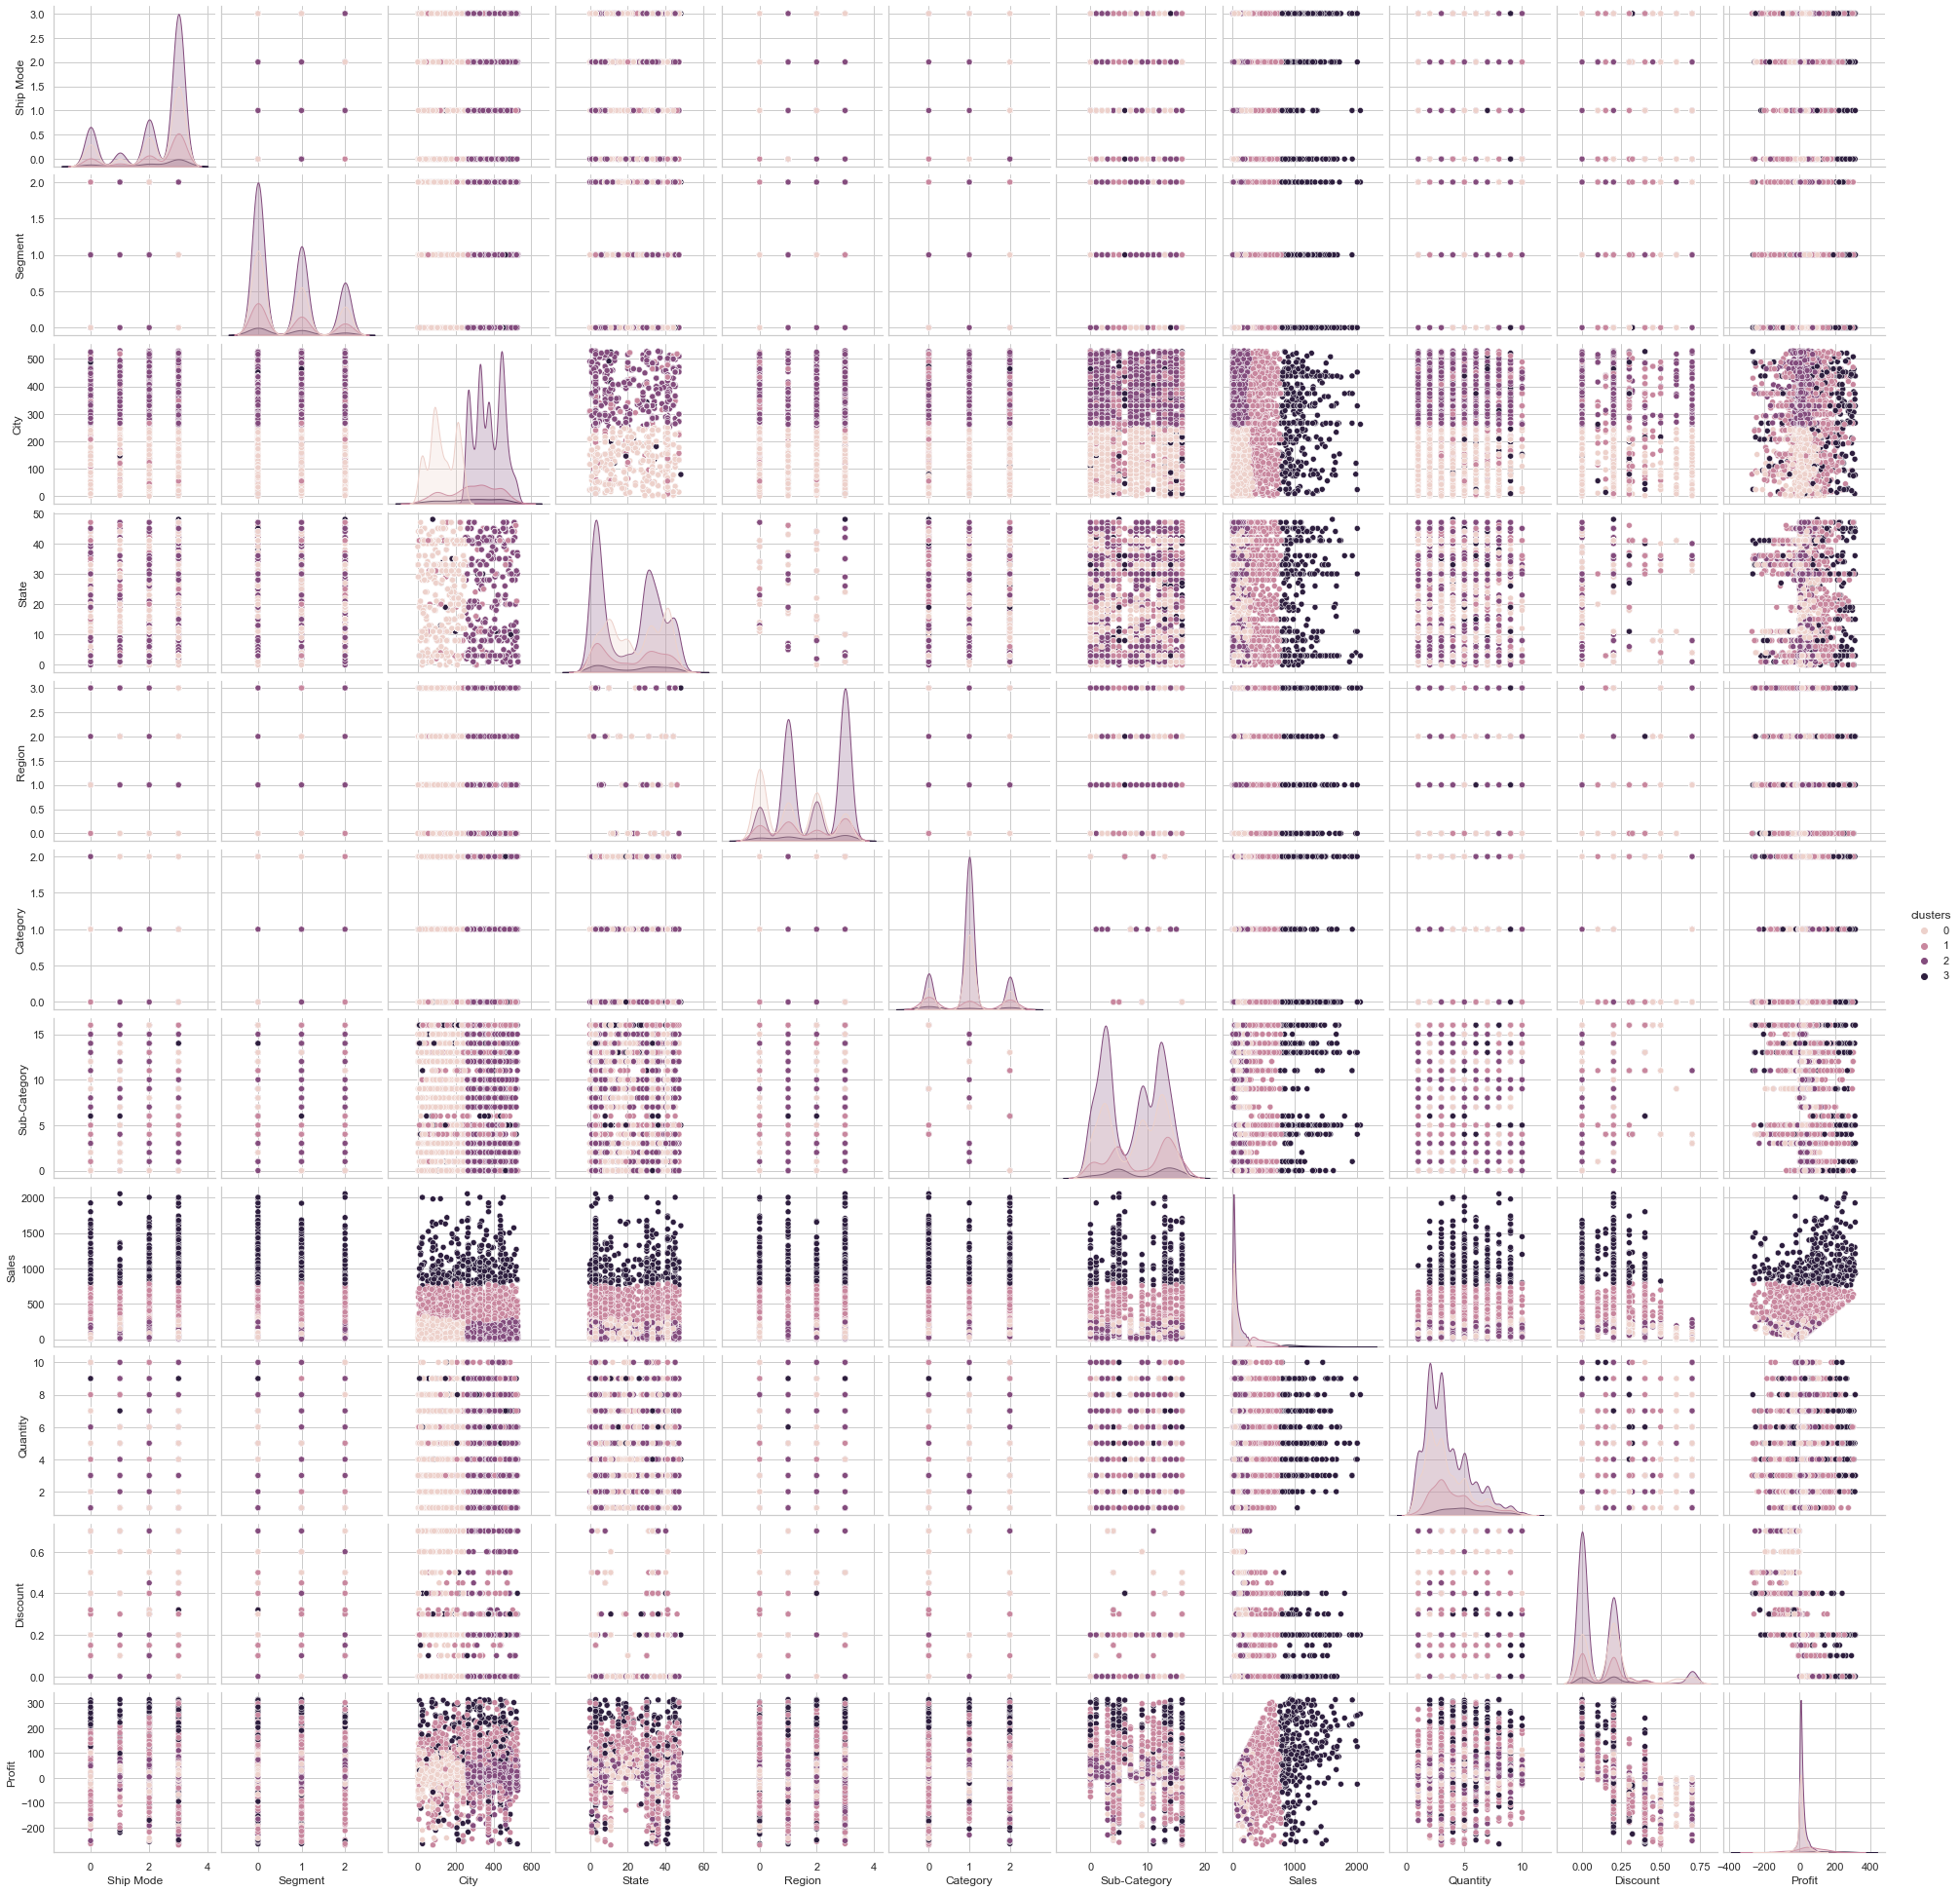

In [59]:
### Visualizing the cluster based on each pair of columns
sn.pairplot(dataset, hue="clusters", diag_kind="kde")
